In [1]:
import numpy as np
import glob
import os
import re
import scipy.io
import matplotlib.pyplot as plt
from PIL import Image
from utils import load_sunrgbd_mappings
REL_PATH = '/home4/shubham/MTML_Pth/datasets/SUNRGBD/'

PATH_TRAIN = '/home4/shubham/MTML_Pth/datasets/sunrgbd-meta-data/SUNRGBD-train_images/'
PATH_TRAIN_LABEL = '/home4/shubham/MTML_Pth/datasets/sunrgbd-meta-data/train13labels/'

PATH_TEST = '/home4/shubham/MTML_Pth/datasets/sunrgbd-meta-data/SUNRGBD-test_images/'
PATH_TEST_LABEL = '/home4/shubham/MTML_Pth/datasets/sunrgbd-meta-data/test13labels/'

In [2]:
def load_dataset_original():
    """
    returns a dictionary of train, test and validation images and their corresponding segmentation maps
    """
    data = {}
    label = {}
    
    images = []
    lab = []
    
        
    for filename in glob.iglob(REL_PATH + '**/image/*.jpg', recursive=True):
        images.append(filename)

    for filename in glob.iglob(REL_PATH + '**/depth/*.png', recursive=True):
        lab.append(filename)
        
    index = np.random.permutation(len(images))

    images = np.array(images)[index]
    labels = np.array(lab)[index]
    
    train = int(len(images)*0.8)
    val = int(len(images)*0.9)
    
    data["train"], data["val"], data["test"] = images[:train], images[train:val], images[val:]
    label["train"], label["val"], label["test"] = labels[:train], labels[train:val], labels[val:]
    
    return data, label

def load_dataset():
    """
    load dataset from pre-split data 5k train and 5k test
    """
    data, label = {}, {}
    
    train = glob.glob(PATH_TRAIN+'*.jpg')
    lab = glob.glob(PATH_TRAIN_LABEL+'*.png')
    data["train"] = sorted(train, key=lambda x: re.findall(r"\d+",x)[1])
    label["train"] = sorted(lab, key=lambda x: re.findall(r"\d+",x)[-1])
    
    test = glob.glob(PATH_TEST+'*.jpg')
    lab = glob.glob(PATH_TEST_LABEL+'*.png')
    test = sorted(test, key=lambda x: re.findall(r"\d+",x)[1])
    lab = sorted(lab, key=lambda x: re.findall(r"\d+",x)[-1])
    
    data["val"] = test[:2000]
    label["val"] = lab[:2000]
    data["test"] = test[2000:]
    label["test"] = lab[2000:]
    
    return data, label
    

In [3]:
d,l =load_dataset_original()

[[0.2        0.2        0.19607843 ... 0.25490196 0.25490196 0.25490196]
 [0.2        0.2        0.2        ... 0.25490196 0.25490196 0.25098039]
 [0.19607843 0.19607843 0.19607843 ... 0.25490196 0.25490196 0.25490196]
 ...
 [0.08627451 0.08627451 0.08627451 ... 0.13333333 0.13333333 0.13333333]
 [0.08627451 0.08627451 0.08627451 ... 0.13333333 0.12941176 0.13333333]
 [0.08627451 0.08627451 0.08627451 ... 0.13333333 0.13333333 0.12941176]]
[[51 51 50 ... 65 65 65]
 [51 51 51 ... 65 65 64]
 [50 50 50 ... 65 65 65]
 ...
 [22 22 22 ... 34 34 34]
 [22 22 22 ... 34 33 34]
 [22 22 22 ... 34 34 33]]


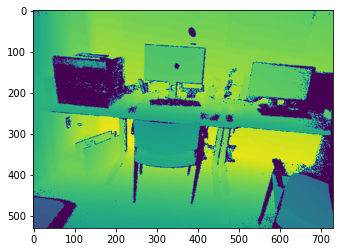

In [4]:
lb = l['train'][11]
img = Image.open(lb)
uint = np.uint8(np.array(img)/256)/255
print(uint)
uint = (uint*255).astype(np.uint8)
print(uint)
img = Image.fromarray(uint)
plt.imshow(img)

In [5]:
print(l["train"][:10])

['/home4/shubham/MTML_Pth/datasets/SUNRGBD/kv1/b3dodata/img_0789/depth/img_0789_abs.png'
 '/home4/shubham/MTML_Pth/datasets/SUNRGBD/xtion/sun3ddata/mit_32_bar/bar_1/0000883-000029592943/depth/0000888-000029598525.png'
 '/home4/shubham/MTML_Pth/datasets/SUNRGBD/kv2/kinect2data/002792_2014-06-22_19-37-20_094959634447_rgbf000076-resize/depth/0000076.png'
 '/home4/shubham/MTML_Pth/datasets/SUNRGBD/xtion/sun3ddata/mit_w85d/d1/0003744-000125813020/depth/0003762-000125802073.png'
 '/home4/shubham/MTML_Pth/datasets/SUNRGBD/xtion/sun3ddata/hotel_m/scan1/0000367-000291157013/depth/0000367-000291157013.png'
 '/home4/shubham/MTML_Pth/datasets/SUNRGBD/kv2/kinect2data/003505_2014-05-21_16-37-23_094959634447_rgbf001474-resize/depth/0001474.png'
 '/home4/shubham/MTML_Pth/datasets/SUNRGBD/kv2/kinect2data/002237_2014-06-28_18-42-37_260595134347_rgbf000058-resize/depth/0000058.png'
 '/home4/shubham/MTML_Pth/datasets/SUNRGBD/realsense/lg/2014_10_28-15_39_48-1311000073/depth/0000063.png'
 '/home4/shubham/M

In [6]:
def ld():
    """
    returns a dictionary of train, test and validation images and their corresponding segmentation maps
    """
    Image = {}
    Depth = {}
    Seg = {}
    
    images = []
    depth = []
    seg = []
        
    for filename in glob.iglob(REL_PATH + '**/image/*.jpg', recursive=True):
        images.append(filename)

    for filename in glob.iglob(REL_PATH + '**/depth/*.png', recursive=True):
        depth.append(filename)
    
    for filename in glob.iglob(REL_PATH + '**/seg.mat', recursive=True):
        seg.append(filename)
    
    index = np.random.permutation(len(images))

    images = np.array(images)[index]
    depth = np.array(depth)[index]
    seg = np.array(seg)[index]
    
    train = int(len(images)*0.8)
    val = int(len(images)*0.9)
    
    Image["train"], Image["val"], Image["test"] = images[:train], images[train:val], images[val:]
    Depth["train"], Depth["val"], Depth["test"] = depth[:train], depth[train:val], depth[val:]
    Seg["train"], Seg["val"], Seg["test"] = seg[:train], seg[train:val], seg[val:]
    
    return Image, Depth, Seg

In [7]:
im, d, s = ld()

In [83]:
mat = s['train'][0]
mat = scipy.io.loadmat(mat)
mat[mat>40] = 0
palette = list(maping.keys())
# key gives the new values you wish palette to be mapped to.
key = np.array(list(maping.values()))
index = np.digitize(a.ravel(), palette, right=True)
new_img = np.array(key[index].reshape(a.shape)).astype(np.uint8)


84


In [84]:
maping = load_sunrgbd_mappings()


{0: 0, 1: 12, 2: 5, 3: 6, 4: 1, 5: 4, 6: 9, 7: 10, 8: 12, 9: 13, 10: 6, 11: 8, 12: 6, 13: 13, 14: 10, 15: 6, 16: 13, 17: 6, 18: 7, 19: 7, 20: 5, 21: 7, 22: 3, 23: 2, 24: 6, 25: 11, 26: 7, 27: 7, 28: 7, 29: 7, 30: 7, 31: 7, 32: 6, 33: 7, 34: 7, 35: 7, 36: 7, 37: 7, 38: 7, 39: 6, 40: 7}


[[ 0  0  0 ... 49 49 49]
 [ 0  0  0 ... 49 49 49]
 [57 57 57 ... 49 49 49]
 ...
 [ 8  8  8 ... 10 10 10]
 [ 8  8  8 ... 10 10 10]
 [ 8  8  8 ... 10 10 10]]


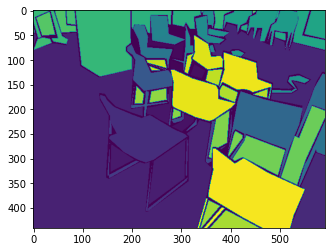

In [85]:
a = mat['seglabel']
img = Image.fromarray(a)
plt.imshow(img)
print(a)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 8  8  8 ... 10 10 10]
 [ 8  8  8 ... 10 10 10]
 [ 8  8  8 ... 10 10 10]]


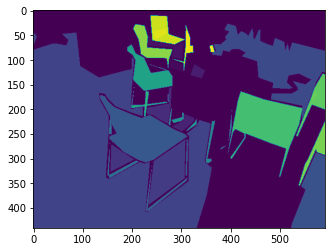

In [86]:
a[a>40] = 0
print((a))
img = Image.fromarray(a)
plt.imshow(img)

In [80]:
# a = np.array([1,2,2,1]).reshape(2,2)
# palette must be given in sorted order
palette = list(maping.keys())
# key gives the new values you wish palette to be mapped to.
key = np.array(list(maping.values()))
index = np.digitize(a.ravel(), palette, right=True)
new_img = np.array(key[index].reshape(a.shape)).astype(np.uint8)
print(new_img)

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]]


[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]
 [12 12 12 ...  6  6  6]]


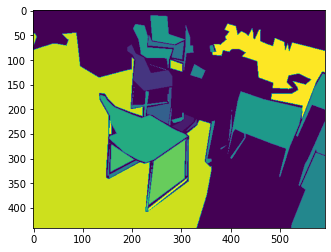

In [87]:
print(new_img)
new_img2 = Image.fromarray(new_img)
plt.imshow(new_img2)


SyntaxError: positional argument follows keyword argument (<ipython-input-112-ec9c6e2d22dd>, line 2)